In [116]:
# Veri setini okuma işlemi
import pandas as pd
import warnings
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
crypto_data = pd.read_csv('BinanceCrypto.csv')
warnings.simplefilter(action='ignore', category=FutureWarning)

In [117]:
crypto_data = pd.read_csv('BinanceCrypto.csv', index_col='Unix')


In [118]:
print(crypto_data.head())

                              Date    Symbol      Open      High       Low  \
Unix                                                                         
1622073600000  2021-05-27 00:00:00  BTC/USDT  39241.92  39243.10  39072.00   
1621987200000  2021-05-26 00:00:00  BTC/USDT  38324.72  40841.00  37800.44   
1621900800000  2021-05-25 00:00:00  BTC/USDT  38810.99  39791.77  36419.62   
1621814400000  2021-05-24 00:00:00  BTC/USDT  34681.44  39920.00  34031.00   
1621728000000  2021-05-23 00:00:00  BTC/USDT  37458.51  38270.64  31111.01   

                  Close     Volume_BTC   Volume_USDT  Tradecount  
Unix                                                              
1622073600000  39105.47     328.737300  1.286808e+07      7097.0  
1621987200000  39241.91  104780.773396  4.113718e+09   2432319.0  
1621900800000  38324.72  111996.228404  4.253520e+09   2508310.0  
1621814400000  38796.29  161630.893971  5.996773e+09   3510578.0  
1621728000000  34655.25  217136.046593  7.431242e+0

In [119]:
crypto_data.head()  #verilerin ilk 5 satırını döndürür.
#print(crypto_data)
#print(crypto_data.index)
#print(crypto_data['Unix'])


,Date,Symbol,Open,High,Low,Close,Volume_BTC,Volume_USDT,Tradecount
Unix,,,,,,,,,
1622073600000,2021-05-27 00:00:00,BTC/USDT,39241.92,39243.10,39072.00,39105.47,328.737300,1.286808e+07,7097.0
1621987200000,2021-05-26 00:00:00,BTC/USDT,38324.72,40841.00,37800.44,39241.91,104780.773396,4.113718e+09,2432319.0
1621900800000,2021-05-25 00:00:00,BTC/USDT,38810.99,39791.77,36419.62,38324.72,111996.228404,4.253520e+09,2508310.0
1621814400000,2021-05-24 00:00:00,BTC/USDT,34681.44,39920.00,34031.00,38796.29,161630.893971,5.996773e+09,3510578.0
1621728000000,2021-05-23 00:00:00,BTC/USDT,37458.51,38270.64,31111.01,34655.25,217136.046593,7.431242e+09,4082004.0


In [53]:
crypto_data.tail() #sondaki 5 veriyi döndürür.

,Date,Symbol,Open,High,Low,Close,Volume_BTC,Volume_USDT,Tradecount
Unix,,,,,,,,,
1503273600,2017-08-21,BTC/USDT,4086.29,4119.62,3911.79,4016.00,685.12,2770592.06,NaN
1503187200,2017-08-20,BTC/USDT,4139.98,4211.08,4032.62,4086.29,463.54,1915636.35,NaN
1503100800,2017-08-19,BTC/USDT,4108.37,4184.69,3850.00,4139.98,371.15,1508239.39,NaN
1503014400,2017-08-18,BTC/USDT,4285.08,4371.52,3938.77,4108.37,1178.07,4994493.56,NaN
1502928000,2017-08-17,BTC/USDT,4469.93,4485.39,4200.74,4285.08,647.86,2812379.11,NaN


In [120]:
# getting the shape of the data: total number of rows and columns in the data set using ".shape"
crypto_data.shape
#print(crypto_data.columns[0])
#print(crypto_data.iloc[:, 0])


(1381, 9)

In [55]:
crypto_data.values

array([['2021-05-27 00:00:00', 'BTC/USDT', 39241.92, ..., 328.7373,
        12868082.0386733, 7097.0],
       ['2021-05-26 00:00:00', 'BTC/USDT', 38324.72, ..., 104780.773396,
        4113717505.26356, 2432319.0],
       ['2021-05-25 00:00:00', 'BTC/USDT', 38810.99, ..., 111996.228404,
        4253519579.37873, 2508310.0],
       ...,
       ['2017-08-19', 'BTC/USDT', 4108.37, ..., 371.15, 1508239.39, nan],
       ['2017-08-18', 'BTC/USDT', 4285.08, ..., 1178.07, 4994493.56, nan],
       ['2017-08-17', 'BTC/USDT', 4469.93, ..., 647.86, 2812379.11, nan]],
      dtype=object)

In [56]:
# sample will randomly "sample" your dataset
crypto_data.sample(10)

,Date,Symbol,Open,High,Low,Close,Volume_BTC,Volume_USDT,Tradecount
Unix,,,,,,,,,
1602720000000,2020-10-15 00:00:00,BTC/USDT,11417.89,11617.34,11250.83,11505.12,48760.717679,5.564364e+08,662386.0
1506470400,2017-09-27,BTC/USDT,3882.35,4249.94,3872.81,4193.00,625.300000,2.542872e+06,NaN
1523232000000,2018-04-09 00:00:00,BTC/USDT,7011.04,7185.00,6611.00,6782.72,34078.297206,2.343100e+08,212669.0
1508371200,2017-10-19,BTC/USDT,5512.06,5710.00,5490.26,5683.90,1869.040000,1.053778e+07,NaN
1589587200000,2020-05-16 00:00:00,BTC/USDT,9315.96,9588.00,9220.00,9381.27,59587.627862,5.605470e+08,692028.0
1510617600,2017-11-14,BTC/USDT,6465.99,6684.98,6311.07,6574.99,1228.660000,8.002218e+06,NaN
1587254400000,2020-04-19 00:00:00,BTC/USDT,7248.60,7266.15,7055.60,7120.74,45664.863930,3.264856e+08,483574.0
1597881600000,2020-08-20 00:00:00,BTC/USDT,11754.38,11888.00,11668.00,11853.55,46085.254351,5.435760e+08,798027.0
1560902400000,2019-06-19 00:00:00,BTC/USDT,9081.97,9304.00,8960.00,9255.49,32147.706495,2.937481e+08,306202.0


In [57]:
# we need an overview of the data types for each column
crypto_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1381 entries, 1622073600000 to 1502928000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         1381 non-null   object 
 1   Symbol       1381 non-null   object 
 2   Open         1381 non-null   float64
 3   High         1381 non-null   float64
 4   Low          1381 non-null   float64
 5   Close        1381 non-null   float64
 6   Volume_BTC   1381 non-null   float64
 7   Volume_USDT  1381 non-null   float64
 8   Tradecount   1257 non-null   float64
dtypes: float64(7), object(2)
memory usage: 107.9+ KB


In [69]:
crypto_data.columns

Index(['Date', 'Symbol', 'Open', 'High', 'Low', 'Close', 'Volume_BTC',
       'Volume_USDT', 'Tradecount'],
      dtype='object')

In [72]:
crypto_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1381.0,1.275463e+04,1.308552e+04,3189.02,6.511010e+03,8.655880e+03,1.108900e+04,6.357501e+04
High,1381.0,1.316335e+04,1.354131e+04,3276.50,6.639000e+03,8.879990e+03,1.147300e+04,6.485400e+04
Low,1381.0,1.228499e+04,1.254436e+04,2817.00,6.379700e+03,8.351000e+03,1.078845e+04,6.202000e+04
Close,1381.0,1.277977e+04,1.310298e+04,3189.02,6.514960e+03,8.663340e+03,1.109961e+04,6.357500e+04
Volume_BTC,1381.0,4.927657e+04,3.752524e+04,225.76,2.672069e+04,4.156995e+04,6.415846e+04,4.022017e+05
Volume_USDT,1381.0,8.035923e+08,1.308131e+09,967753.32,1.875184e+08,3.415523e+08,6.540572e+08,1.347769e+10
Tradecount,1257.0,6.936309e+05,7.275301e+05,7097.00,2.304310e+05,4.029970e+05,8.041790e+05,6.331062e+06


In [74]:
# Boş verilerin olup olmadığını True/False olarak gösterir
crypto_data.isna()
crypto_data.isnull()

,Date,Symbol,Open,High,Low,Close,Volume_BTC,Volume_USDT,Tradecount
Unix,,,,,,,,,
1622073600000,False,False,False,False,False,False,False,False,False
1621987200000,False,False,False,False,False,False,False,False,False
1621900800000,False,False,False,False,False,False,False,False,False
1621814400000,False,False,False,False,False,False,False,False,False
1621728000000,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1503273600,False,False,False,False,False,False,False,False,True
1503187200,False,False,False,False,False,False,False,False,True
1503100800,False,False,False,False,False,False,False,False,True


In [75]:
crypto_data.notnull()

,Date,Symbol,Open,High,Low,Close,Volume_BTC,Volume_USDT,Tradecount
Unix,,,,,,,,,
1622073600000,True,True,True,True,True,True,True,True,True
1621987200000,True,True,True,True,True,True,True,True,True
1621900800000,True,True,True,True,True,True,True,True,True
1621814400000,True,True,True,True,True,True,True,True,True
1621728000000,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...
1503273600,True,True,True,True,True,True,True,True,False
1503187200,True,True,True,True,True,True,True,True,False
1503100800,True,True,True,True,True,True,True,True,False


In [76]:
# Veri setindeki kayıp, eksik (missing) değerlerin özellik bazlı sayısı
# Çıktı: Her bir özelliğe ait kayıp değerlerin sayısını ekrana basar
print("Özellik Bazlı Kayıp Değerlerin Sayısı:")
print(crypto_data.isnull().sum())

Özellik Bazlı Kayıp Değerlerin Sayısı:
Date             0
Symbol           0
Open             0
High             0
Low              0
Close            0
Volume_BTC       0
Volume_USDT      0
Tradecount     124
dtype: int64


In [77]:
# sort the sum of NaN values
crypto_data.isna().sum().sort_values(ascending=False)

Tradecount     124
Date             0
Symbol           0
Open             0
High             0
Low              0
Close            0
Volume_BTC       0
Volume_USDT      0
dtype: int64

In [78]:
missingPercentages = crypto_data.isna().sum().sort_values(ascending = False)/len(crypto_data)*100
print(missingPercentages)

Tradecount     8.979001
Date           0.000000
Symbol         0.000000
Open           0.000000
High           0.000000
Low            0.000000
Close          0.000000
Volume_BTC     0.000000
Volume_USDT    0.000000
dtype: float64


In [63]:
# Filter: sort out the ones with zeroes
missingPercentages[missingPercentages != 0]

Tradecount    8.979001
dtype: float64

In [79]:
crypto_data.Tradecount.unique()
#crypto_data.low.unique()


array([   7097., 2432319., 2508310., ...,  116569.,   91956.,      nan])

In [ ]:
#Preprocessing:

In [ ]:
#  i. Check whether there are any outliers? Remove outliers (if there are
#  any) in your data.

In [121]:
# Silinecek outlierların alt ve üst sınır kontrolünü sağlayan bir fonksiyon.

def optimise_values(n):
    if n>=upper_limit:
        return upper_limit
    elif n<=lower_limit:
        return lower_limit
    else:
        return n

In [122]:
# Sütunlardaki outlier olan verileri sırasıyla silen bir döngü. Çeyreklikler göz önünde bulundurulmuştur.

cols = [ 'Open', 'High','Low', 'Close', 'Volume_BTC', 'Volume_USDT', 'Tradecount']

for i in cols:
    perc_25 = crypto_data[i].quantile(.25)
    perc_75 = crypto_data[i].quantile(.75)
    iqr = perc_75 - perc_25
    upper_limit = perc_75 + 1.5 * iqr
    lower_limit = perc_25 - 1.5 * iqr
    crypto_data[i]=crypto_data[i].apply(optimise_values)

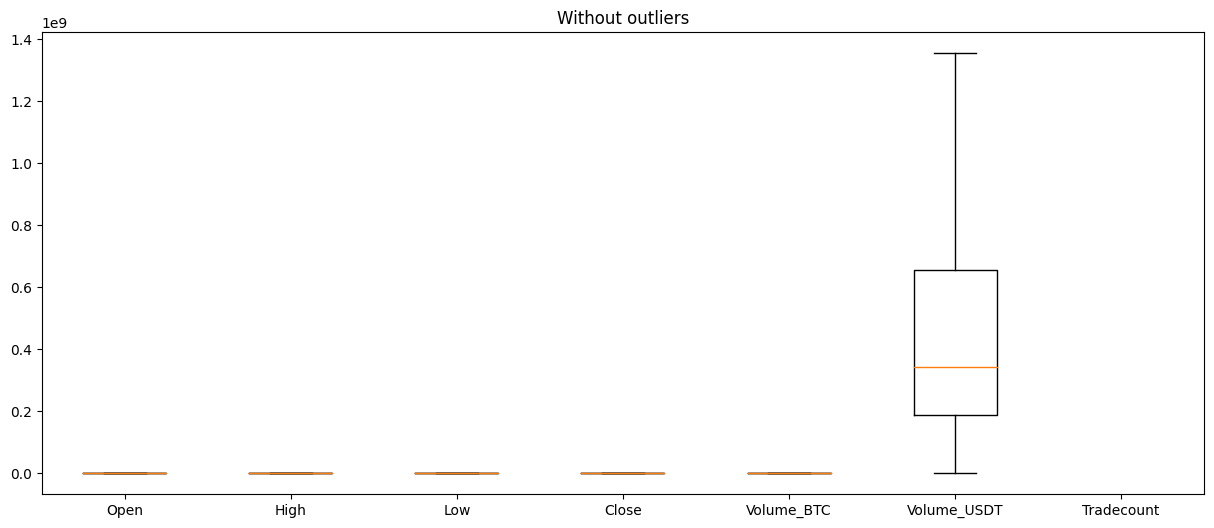

In [123]:
# Outlier'lar silindikten sonraki sütunlardaki verilerin görselleştirilmesi.

plt.figure(figsize=(15,6),dpi=100)
plt.boxplot(crypto_data[['Open', 'High','Low', 'Close', 'Volume_BTC', 'Volume_USDT', 'Tradecount']],labels=['Open', 'High','Low', 'Close', 'Volume_BTC', 'Volume_USDT', 'Tradecount'])
plt.title('Without outliers');

In [124]:
# Tradecount sütununun label olarak seçilerek y ve X olarak verisetinin ayrılması.

X = crypto_data.drop('Tradecount',axis=1)
y = crypto_data['Tradecount']

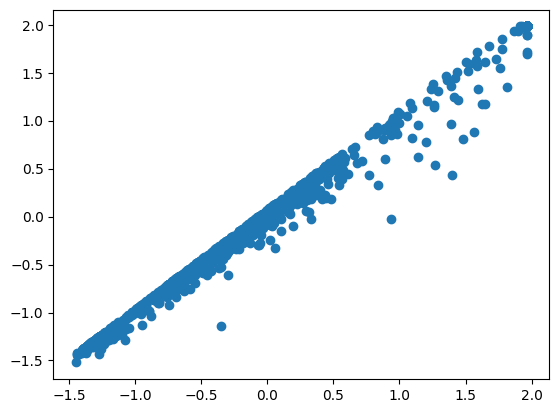

In [125]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# Assuming X is your DataFrame, and you want to scale numeric columns
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns

# Separate non-numeric columns (like 'Date') and numeric columns
non_numeric_cols = X.columns.difference(numeric_cols)
X_numeric = X[numeric_cols]

# Standardize numeric columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Create a DataFrame with scaled values
X_scaled_df = pd.DataFrame(X_scaled, columns=numeric_cols)

# Plot the scatter plot with the scaled values
plt.scatter(X_scaled_df.iloc[:, 0], X_scaled_df.iloc[:, 2])
plt.show()


In [126]:
dfTemp_X_scaled = pd.DataFrame(X_scaled, columns=['Open', 'High','Low', 'Close', 'Volume_BTC', 'Volume_USDT'])

dfTemp_y = pd.DataFrame(y,columns=['Tradecount'])
result = dfTemp_X_scaled.join(dfTemp_y, how='inner')

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


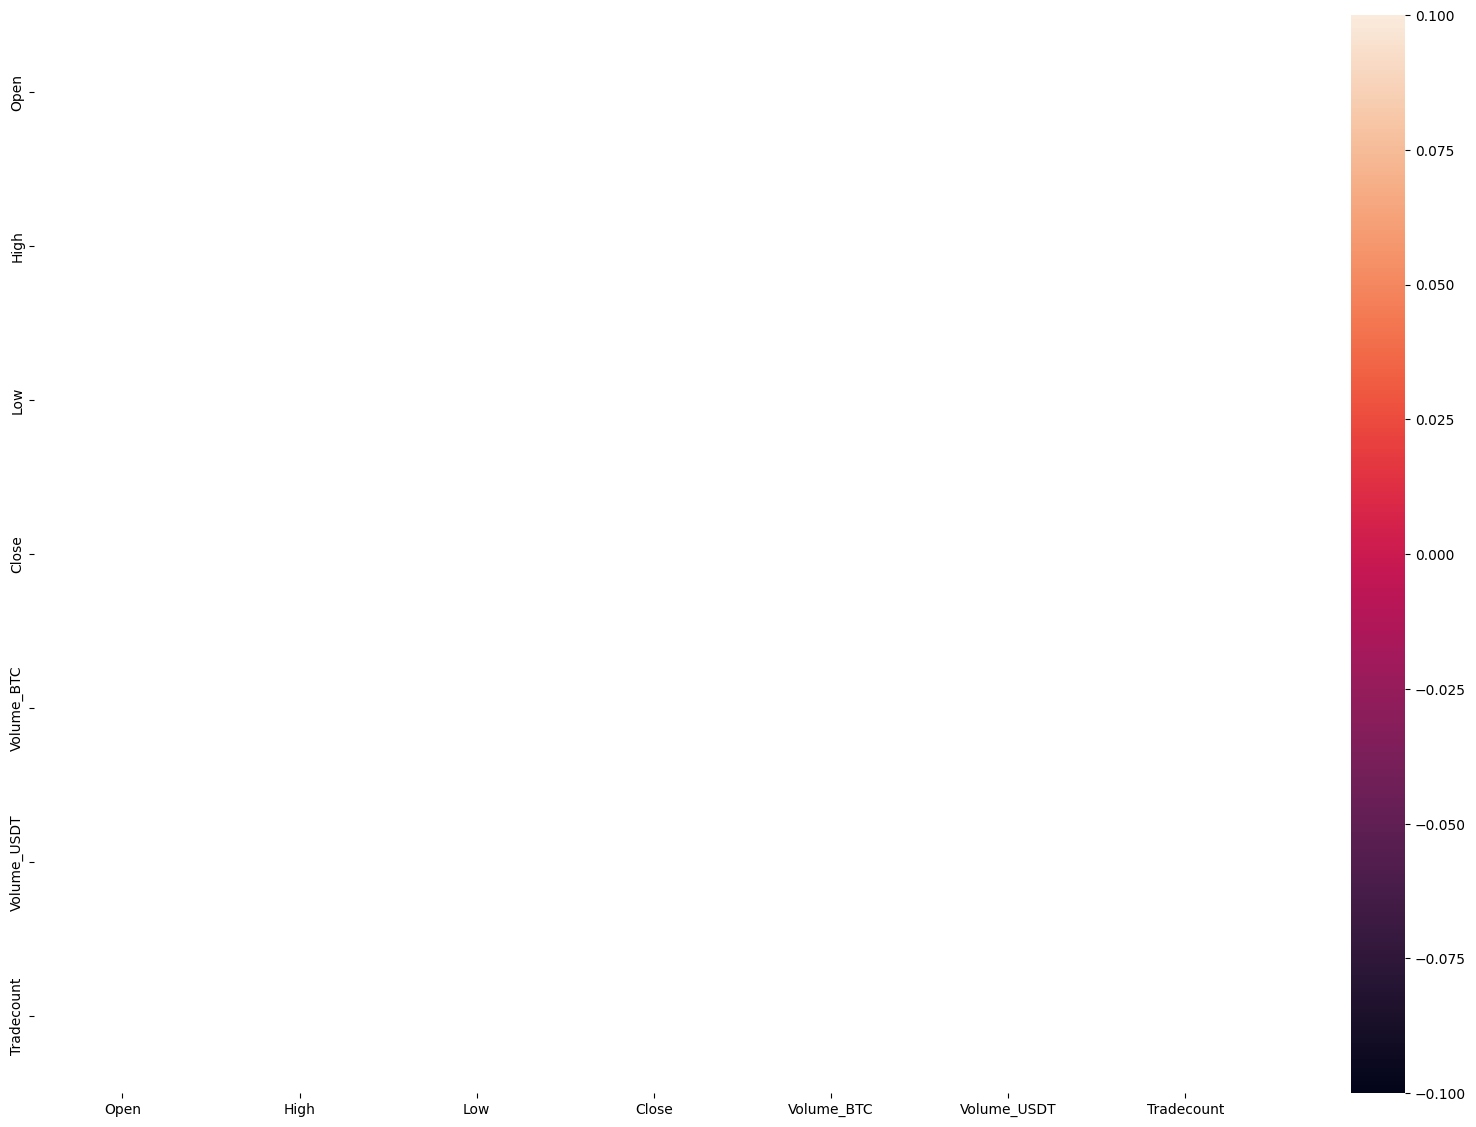

In [127]:
plt.figure(figsize = (20, 14))
sns.heatmap(result.corr(), annot = True)
plt.show()

In [128]:
data2 = result.copy()
data2['Tradecount'] = y

corr = data2.corr()['Tradecount'].sort_values(ascending=False)
corr = corr.to_frame()
corr.style.background_gradient(cmap="RdYlBu")

,Tradecount
Tradecount,1.000000
Open,nan
High,nan
Low,nan
Close,nan
Volume_BTC,nan
Volume_USDT,nan


In [132]:
# PCA ile boyut azaltma
X_pca = pca.fit_transform(XTemp)

explained_variance_ratio = pca.explained_variance_ratio_  # Var
components = pca.components_  # özvektörler

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('1st Bileşen')
plt.ylabel('2nd Bileşen')
plt.title('PCA Sonuçları')
plt.colorbar()
plt.show()

ValueError: ignored

In [133]:
# Train ve test ayrışımı.

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.20,stratify=y, random_state=42)

NameError: ignored